<a href="https://colab.research.google.com/github/dspierre/ConsoleApp2/blob/master/reco_film_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%html
<style>
.output_subarea {
    background: #fafafa;
    border: 1px solid #eeeeee;
    border-radius: 3px;
}
table.dataframe {
    margin-right: auto !important;             
    margin-left: auto !important;
    border: 1px solid #747474;
    box-shadow: 0px 0px 2px 1px #9d9d9d;}

table.dataframe tr {
    height: 30px !important;
    background: #dfdfdf !IMPORTANT;
}

table.dataframe td {
    text-align: center;
}

table.dataframe tr:nth-child(even) {
    background: #cbcaca !IMPORTANT;
}

table.dataframe thead tr {
    text-align: center !important;
    background: #686868 !important;
    color: white;
}
</style>

In [2]:
import pandas as pd
print('Pandas version: ', pd.__version__)
import numpy as np
print('NumPy version: ', np.__version__)

import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

from matplotlib import pyplot as plt

import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans


import pickle
print('Pickle version: ', pickle.format_version)

import sys
print('Sys version: ', sys.version[0:5])

from sys import exc_info

import ast

Pandas version:  1.1.5
NumPy version:  1.19.5
Matplotlib version:  3.2.2
Scikit-Learn version:  0.22.2.post1
Pickle version:  4.0
Sys version:  3.7.1


In [3]:
import time

In [4]:
ratings = pd.read_csv('/content/ratings.csv', usecols = ['userId', 'movieId','rating'])
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')

Shape of ratings dataset is:  (330640, 3) 

Max values in dataset are 
 userId       3526.0
movieId    176271.0
rating          5.0
dtype: float64 

Min values in dataset are 
 userId     1.0
movieId    1.0
rating     0.5
dtype: float64 



In [5]:
# Filtering data for only 4+ ratings
ratings = ratings[ratings['rating'] >= 4.0]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')

Shape of ratings dataset is:  (165934, 3) 

Max values in dataset are 
 userId       3526.0
movieId    176271.0
rating          5.0
dtype: float64 

Min values in dataset are 
 userId     1.0
movieId    1.0
rating     4.0
dtype: float64 



In [6]:
movies_list = np.unique(ratings['movieId'])[:200]
ratings = ratings.loc[ratings['movieId'].isin(movies_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')

Shape of ratings dataset is:  (10932, 3) 

Max values in dataset are 
 userId     3525.0
movieId     232.0
rating        5.0
dtype: float64 

Min values in dataset are 
 userId     1.0
movieId    1.0
rating     4.0
dtype: float64 



In [7]:
users_list = np.unique(ratings['userId'])[:100]
ratings = ratings.loc[ratings['userId'].isin(users_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['userId']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['movieId']).shape[0])

Shape of ratings dataset is:  (477, 3) 

Max values in dataset are 
 userId     155.0
movieId    232.0
rating       5.0
dtype: float64 

Min values in dataset are 
 userId     1.0
movieId    1.0
rating     4.0
dtype: float64 

Total Users:  100
Total Movies which are rated by 100 users:  92


In [8]:
users_fav_movies = ratings.loc[:, ['userId', 'movieId']]

In [9]:
users_fav_movies

,userId,movieId
1,1,147
31,2,64
32,2,79
59,4,223
204,8,1
...,...,...
12983,153,150
12985,153,175
12986,153,198
13095,155,32


In [10]:
users_fav_movies = ratings.reset_index(drop = True)

In [11]:

users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476
userId,1.0,2.0,2.0,4.0,8.0,8.0,9.0,9.0,10.0,10.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,15.0,16.0,16.0,16.0,16.0,18.0,20.0,20.0,20.0,20.0,22.0,...,142.0,142.0,142.0,142.0,146.0,146.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,151.0,151.0,151.0,151.0,151.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,155.0,155.0
movieId,147.0,64.0,79.0,223.0,1.0,47.0,1.0,150.0,150.0,165.0,34.0,1.0,16.0,17.0,29.0,34.0,47.0,50.0,82.0,97.0,123.0,125.0,150.0,162.0,175.0,176.0,194.0,223.0,232.0,6.0,32.0,50.0,111.0,198.0,81.0,1.0,39.0,150.0,161.0,110.0,...,50.0,110.0,111.0,147.0,50.0,110.0,1.0,16.0,34.0,36.0,39.0,45.0,47.0,50.0,69.0,86.0,104.0,110.0,111.0,125.0,145.0,159.0,175.0,223.0,230.0,21.0,36.0,58.0,110.0,224.0,1.0,6.0,22.0,70.0,110.0,150.0,175.0,198.0,32.0,107.0
rating,4.5,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.5,5.0,5.0,4.5,5.0,4.0,5.0,4.0,4.0,5.0,...,4.0,5.0,4.0,4.0,4.5,4.5,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.5,4.0,4.5,4.0,4.5,5.0


In [15]:
users_fav_movies.to_csv('/content/filtered_ratings.csv2')

In [16]:
def moviesListForUsers(users, users_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['movieId'])).split('[')[1].split(']')[0])
    return users_movies_list

In [17]:
users = np.unique(users_fav_movies['userId'])
print(users.shape)

(100,)


In [18]:
users_movies_list = moviesListForUsers(users, users_fav_movies)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10])

Movies list for 100  users
A list of first 10 users favourite movies: 
 ['147', '64, 79', '223', '1, 47', '1, 150', '150, 165', '34', '1, 16, 17, 29, 34, 47, 50, 82, 97, 123, 125, 150, 162, 175, 176, 194, 223, 232', '6', '32, 50, 111, 198']


In [19]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [20]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

In [21]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

,1,10,101,104,105,107,11,110,111,112,116,117,118,123,125,141,144,145,147,150,151,153,154,158,159,16,161,162,163,165,168,17,170,172,173,175,176,18,180,185,...,22,223,224,230,231,232,24,25,29,32,34,36,38,39,40,41,43,44,45,47,5,50,52,58,6,62,64,69,70,72,79,80,81,82,86,88,89,94,95,97
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
151,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
first_6_users_SM = users_fav_movies[users_fav_movies['userId'].isin(users[:6])].sort_values('userId')
first_6_users_SM.T

,0,1,2,3,4,5,6,7,8,9
userId,1.0,2.0,2.0,4.0,8.0,8.0,9.0,9.0,10.0,10.0
movieId,147.0,64.0,79.0,223.0,1.0,47.0,1.0,150.0,150.0,165.0
rating,4.5,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0


In [23]:
df_sparseMatrix.loc[np.unique(first_6_users_SM['userId']), list(map(str, np.unique(first_6_users_SM['movieId'])))]

,1,47,64,79,147,150,165,223
1,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0
9,1,0,0,0,0,1,0,0
10,0,0,0,0,0,1,1,0


In [24]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [25]:
elbow_method = elbowMethod(sparseMatrix)

In [26]:

elbow_method.run(1, 10)

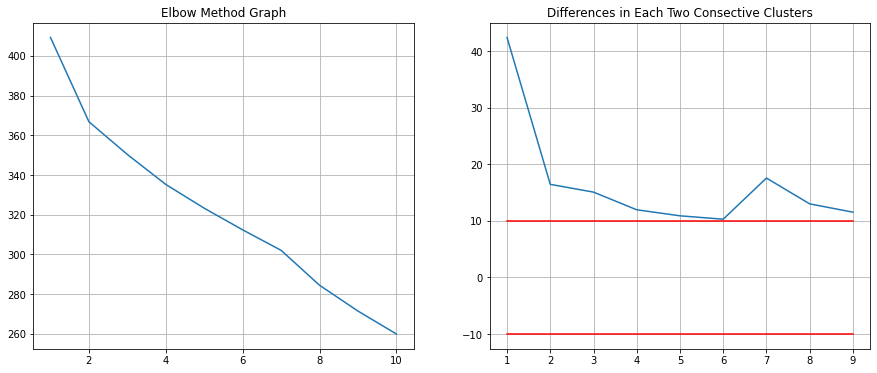

In [27]:
elbow_method.showPlot(boundary = 10)

In [28]:

elbow_method.run(11, 30)

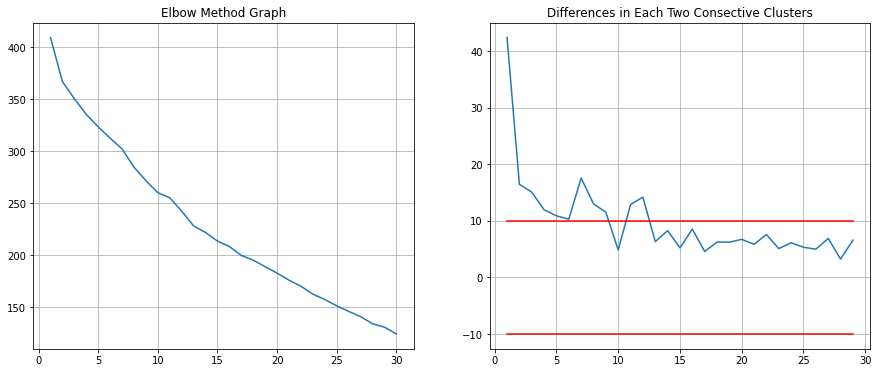

In [29]:
elbow_method.showPlot(boundary = 10)

In [30]:
kmeans = KMeans(n_clusters=15, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [31]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
userId,1,2,4,8,9,10,11,12,15,16,18,20,22,24,25,27,28,29,30,33,34,35,36,37,40,41,43,44,46,47,49,51,52,53,54,55,56,58,59,60,...,87,88,89,91,93,94,95,98,99,101,103,105,106,107,111,112,113,114,115,117,118,119,120,123,125,126,127,128,129,131,132,133,134,137,142,146,150,151,153,155
Cluster,1,1,1,10,10,1,1,3,1,0,1,9,1,4,1,6,6,1,2,9,2,1,1,1,10,1,1,10,12,6,7,10,0,8,1,10,6,2,6,1,...,1,1,2,11,1,6,1,6,0,10,2,6,1,1,2,6,10,1,2,1,1,9,0,14,0,9,2,1,6,2,8,0,1,1,6,6,5,1,10,0


In [32]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['movieId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movieId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies

In [33]:

cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [34]:
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
movieId,150,110,223,17,21,34,104,58,147,163,165,112,208,39,29,6,141,180,175,173,170,215,153,216,194,2,125,111,5,81,79,72,64,62,52,47,45,43,36,24,10,224
Count,6,5,3,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
for i in range(15):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  10
Users in Cluster 1 ->  37
Users in Cluster 2 ->  11
Users in Cluster 3 ->  1
Users in Cluster 4 ->  1
Users in Cluster 5 ->  1
Users in Cluster 6 ->  18
Users in Cluster 7 ->  1
Users in Cluster 8 ->  2
Users in Cluster 9 ->  4
Users in Cluster 10 ->  10
Users in Cluster 11 ->  1
Users in Cluster 12 ->  1
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1


In [36]:
def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['movieId'])

In [37]:
def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['movieId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster

In [38]:
movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 6)

In [59]:
clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 6)
clusters_fixed 

([    movieId  Count
  0        32     10
  1       111      3
  2        25      2
  3        29      2
  4        50      2
  5       101      2
  6         6      1
  7       110      1
  8       208      1
  9       198      1
  10      175      1
  11      162      1
  12      112      1
  13       52      1
  14      107      1
  15       16      1
  16       47      1
  17       36      1
  18       34      1
  19       17      1
  20      232      1
  21        1      1
  22       82      1
  23       97      1
  24      123      1
  25      125      1
  26      150      1
  27      176      1
  28      194      1
  29      223      1
  30       69      1
  31      104      1
  32      118      1
  33      123      1
  34      180      1
  35      223      1,     movieId  Count
  0       150      6
  1       110      5
  2       223      3
  3        17      3
  4        21      3
  ..      ...    ...
  83      188      1
  84      231      1
  85       50      1
  86      188 

In [39]:
j = 0
for i in range(15):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    if len_users < 6:
        print('Users in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j)

Users in Cluster 3 ->  1
Users in Cluster 4 ->  1
Users in Cluster 5 ->  1
Users in Cluster 7 ->  1
Users in Cluster 8 ->  2
Users in Cluster 9 ->  4
Users in Cluster 11 ->  1
Users in Cluster 12 ->  1
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1
Total Cluster which we want to remove ->  10


In [40]:

print('Length of total clusters before fixing is -> ', len(cluster_movies))
print('Max value in users_cluster dataframe column Cluster is -> ', users_cluster['Cluster'].max())
print('And dataframe is following')
users_cluster.T

Length of total clusters before fixing is ->  15
Max value in users_cluster dataframe column Cluster is ->  14
And dataframe is following


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
userId,1,2,4,8,9,10,11,12,15,16,18,20,22,24,25,27,28,29,30,33,34,35,36,37,40,41,43,44,46,47,49,51,52,53,54,55,56,58,59,60,...,87,88,89,91,93,94,95,98,99,101,103,105,106,107,111,112,113,114,115,117,118,119,120,123,125,126,127,128,129,131,132,133,134,137,142,146,150,151,153,155
Cluster,1,1,1,10,10,1,1,3,1,0,1,9,1,4,1,6,6,1,2,9,2,1,1,1,10,1,1,10,12,6,7,10,0,8,1,10,6,2,6,1,...,1,1,2,11,1,6,1,6,0,10,2,6,1,1,2,6,10,1,2,1,1,9,0,14,0,9,2,1,6,2,8,0,1,1,6,6,5,1,10,0


In [41]:
print('Length of total clusters after fixing is -> ', len(movies_df_fixed))
print('Max value in users_cluster dataframe column Cluster is -> ', clusters_fixed['Cluster'].max())
print('And fixed dataframe is following')
clusters_fixed.T

Length of total clusters after fixing is ->  5
Max value in users_cluster dataframe column Cluster is ->  4
And fixed dataframe is following


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
userId,1,2,4,8,9,10,11,12,15,16,18,20,22,24,25,27,28,29,30,33,34,35,36,37,40,41,43,44,46,47,49,51,52,53,54,55,56,58,59,60,...,87,88,89,91,93,94,95,98,99,101,103,105,106,107,111,112,113,114,115,117,118,119,120,123,125,126,127,128,129,131,132,133,134,137,142,146,150,151,153,155
Cluster,1,1,1,4,4,1,1,0,1,0,1,2,1,1,1,3,3,1,2,1,2,1,1,1,4,1,1,4,1,3,1,4,0,1,1,4,3,2,3,1,...,1,1,2,1,1,3,1,3,0,4,2,3,1,1,2,3,4,1,2,1,1,3,0,1,0,1,2,1,3,2,0,0,1,1,3,3,1,1,4,0


In [42]:
print('Users cluster dataFrame for cluster 11 before fixing:')
users_cluster[users_cluster['Cluster'] == 11].T

Users cluster dataFrame for cluster 11 before fixing:


,63
userId,91
Cluster,11


In [43]:
print('Users cluster dataFrame for cluster 4 after fixing which should be same as 11th cluster before fixing:')
clusters_fixed[clusters_fixed['Cluster'] == 4].T

Users cluster dataFrame for cluster 4 after fixing which should be same as 11th cluster before fixing:


,3,4,24,27,31,35,51,69,76,98
userId,8,9,40,44,51,55,74,101,113,153
Cluster,4,4,4,4,4,4,4,4,4,4


In [44]:
print('Size of movies dataframe after fixing -> ', len(movies_df_fixed))

Size of movies dataframe after fixing ->  5


In [45]:
for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  12
Users in Cluster 1 ->  46
Users in Cluster 2 ->  13
Users in Cluster 3 ->  19
Users in Cluster 4 ->  10


In [46]:
for i in range(len(movies_df_fixed)):
    print('Total movies in Cluster ' + str(i) + ' -> ', movies_df_fixed[i].shape[0])

Total movies in Cluster 0 ->  36
Total movies in Cluster 1 ->  88
Total movies in Cluster 2 ->  39
Total movies in Cluster 3 ->  31
Total movies in Cluster 4 ->  20


In [65]:
class saveLoadFiles:
    def save(self, filename, data):
        try:
            file = open('/content/sample_datas/' + filename + '.pkl', 'wb')
            pickle.dump(data, file)
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            file.close()
            return [True]
    def load(self, filename):
        try:
            file = open('/content/sample_data/' + filename + '.pkl', 'rb')
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            data = pickle.load(file)
            file.close()
            return data
    def loadClusterMoviesDataset(self):
        return self.load('clusters_movies_dataset')
    def saveClusterMoviesDataset(self, data):
        return self.save('clusters_movies_dataset', data)
    def loadUsersClusters(self):
        return self.load('users_clusters')
    def saveUsersClusters(self, data):
        return self.save('users_clusters', data)

In [71]:
saveLoadFile = saveLoadFiles()
print(saveLoadFile.saveClusterMoviesDataset(movies_df_fixed))
print(saveLoadFile.saveUsersClusters(clusters_fixed))

Error: <class 'FileNotFoundError'>, [Errno 2] No such file or directory: '/content/sample_datas/clusters_movies_dataset.pkl'


UnboundLocalError: ignored

In [68]:
load_movies_list, load_users_clusters = saveLoadFile.loadClusterMoviesDataset(), saveLoadFile.loadUsersClusters()
print('Type of Loading list of Movies dataframes of 5 Clusters: ', type(load_movies_list), ' and Length is: ', len(load_movies_list))
print('Type of Loading 100 Users clusters Data: ', type(load_users_clusters), ' and Shape is: ', load_users_clusters.shape)

Type of Loading list of Movies dataframes of 5 Clusters:  <class 'list'>  and Length is:  5
Type of Loading 100 Users clusters Data:  <class 'pandas.core.frame.DataFrame'>  and Shape is:  (100, 2)


In [69]:

class userRequestedFor:
    def __init__(self, user_id, users_data):
        self.users_data = users_data.copy()
        self.user_id = user_id
        # Find User Cluster
        users_cluster = saveLoadFiles().loadUsersClusters()
        self.user_cluster = int(users_cluster[users_cluster['userId'] == self.user_id]['Cluster'])
        # Load User Cluster Movies Dataframe
        self.movies_list = saveLoadFiles().loadClusterMoviesDataset()
        self.cluster_movies = self.movies_list[self.user_cluster] # dataframe
        self.cluster_movies_list = list(self.cluster_movies['movieId']) # list
    def updatedFavouriteMoviesList(self, new_movie_Id):
        if new_movie_Id in self.cluster_movies_list:
            self.cluster_movies.loc[self.cluster_movies['movieId'] == new_movie_Id, 'Count'] += 1
        else:
            self.cluster_movies = self.cluster_movies.append([{'movieId':new_movie_Id, 'Count': 1}], ignore_index=True)
        self.cluster_movies.sort_values(by = ['Count'], ascending = False, inplace= True)
        self.movies_list[self.user_cluster] = self.cluster_movies
        saveLoadFiles().saveClusterMoviesDataset(self.movies_list)

    def recommendMostFavouriteMovies(self):
        try:
            user_movies = getMoviesOfUser(self.user_id, self.users_data)
            cluster_movies_list = self.cluster_movies_list.copy()
            for user_movie in user_movies:
                if user_movie in cluster_movies_list:
                    cluster_movies_list.remove(user_movie)
            return [True, cluster_movies_list]
        except KeyError:
            err = "User history does not exist"
            print(err)
            return [False, err]
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            return [False, err]

In [51]:
movies_metadata = pd.read_csv('/content/movies_metadata.csv', usecols = ['id', 'genres', 'original_title'])

movies_metadata = movies_metadata.loc[
    movies_metadata['id'].isin(list(map(str, np.unique(users_fav_movies['movieId']))))].reset_index(drop=True)
print('Let take a look at movie metadata for all those movies which we were had in our dataset')
movies_metadata

Let take a look at movie metadata for all those movies which we were had in our dataset


,genres,id,original_title
0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",5,Four Rooms
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",11,Star Wars
2,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",101,Léon
3,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,Trois couleurs : Rouge
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",6,Judgment Night
...,...,...,...
65,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",17,The Dark
66,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",186,Lucky Number Slevin
67,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",58,Pirates of the Caribbean: Dead Man's Chest
68,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",82,Miami Vice


In [52]:
user12Movies = getMoviesOfUser(12, users_fav_movies)
for movie in user12Movies:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre['name'], ', ', end = '')
        print(end = '\b\b]')
        print('')

Movie title:  ['Dancer in the Dark'] , Genres: [Drama , Crime , Music , ]
Movie title:  ['The Dark'] , Genres: [Horror , Thriller , Mystery , ]
Movie title:  ['Miami Vice'] , Genres: [Action , Adventure , Crime , Thriller , ]
Movie title:  ['Tron'] , Genres: [Science Fiction , Action , Adventure , ]
Movie title:  ['The Lord of the Rings'] , Genres: [Fantasy , Drama , Animation , Adventure , ]
Movie title:  ['48 Hrs.'] , Genres: [Thriller , Action , Comedy , Crime , Drama , ]
Movie title:  ['Edward Scissorhands'] , Genres: [Fantasy , Drama , Romance , ]
Movie title:  ['Le Grand Bleu'] , Genres: [Adventure , Drama , Romance , ]
Movie title:  ['Saw'] , Genres: [Horror , Mystery , Crime , ]
Movie title:  ["Le fabuleux destin d'Amélie Poulain"] , Genres: [Comedy , Romance , ]
Movie title:  ['Rebecca'] , Genres: [Drama , Mystery , ]
Movie title:  ['Rumble Fish'] , Genres: [Action , Adventure , Crime , Drama , Romance , ]


In [70]:
user12Recommendations = userRequestedFor(12, users_fav_movies).recommendMostFavouriteMovies()[1]
for movie in user12Recommendations[:15]:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre['name'], ', ', end = '')
        print(']', end = '')
        print()

Movie title:  ['Trois couleurs : Rouge'] , Genres: [Drama , Mystery , Romance , ]
Movie title:  ["Ocean's Eleven"] , Genres: [Thriller , Crime , ]
Movie title:  ['Judgment Night'] , Genres: [Action , Thriller , Crime , ]
Movie title:  ['Scarface'] , Genres: [Action , Crime , Drama , Thriller , ]
Movie title:  ['Back to the Future Part II'] , Genres: [Adventure , Comedy , Family , Science Fiction , ]
Movie title:  ["Ocean's Twelve"] , Genres: [Thriller , Crime , ]
Movie title:  ['To Be or Not to Be'] , Genres: [Comedy , War , ]
Movie title:  ['Back to the Future Part III'] , Genres: [Adventure , Comedy , Family , Science Fiction , ]
Movie title:  ['A Clockwork Orange'] , Genres: [Science Fiction , Drama , ]
Movie title:  ['Minority Report'] , Genres: [Action , Thriller , Science Fiction , Mystery , ]
